In [4]:
import re
import copy
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
from collections import defaultdict

from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

def get_adjacent(coord):
    x, y, z = coord
    
    coords = {(x+1, y, z), (x, y+1, z), (x, y, z+1), (x-1, y, z), (x, y-1, z), (x, y, z-1)}
    
    return coords

def is_air_pocket(start, lava, pockets, exposed):

    queue = list(get_adjacent(start))
    seen = {start}
    
    while queue:
        coord = queue.pop(0)
        if coord in seen or coord in lava:
            continue
            
        seen.add(coord)
        
        # if we reach something we know is an air pocket, then this must be an air pocket
        if coord in pockets:
            return True
        
        x, y, z = coord
        
        # if we are outside normal bounds, we are free
        if x < 0 or y < 0 or z < 0:
            return False
        
        # if something is next to something we know is exposed, it must also be exposed
        if coord in exposed:
            return False

        
        queue.extend(list(get_adjacent(coord)))
    return True
    

def get_air_pockets(lava, bounds):
    """ 
    Must find path from coord to outside air 
    
    For simplicity consider every possible coordinate that is not
    known to be lava. Keep track of points known to be exposed or
    known to be air pockets. If a point can reach one of these points
    it must be the same type.
    """
    mx, my, mz = bounds
    pockets = set()
    exposed = {(0, 0, 0), bounds}
    for x in range(1, mx):
        for y in range(1, my):
            for z in range(1, mz):
                coord = (x, y, z)
                
                # we are only searching for empty space
                if coord in lava:
                    continue
                else:
                    if is_air_pocket(coord, lava, pockets, exposed):
                        pockets.add(coord)
                    else:
                        exposed.add(coord)
                    
    return pockets

with open('../inputs/18.txt') as f:
    lava = set()
    for line in f:
        coord = tuple([int(c) for c in line.strip().split(',')])
        lava.add(coord)
        
    bounds = (0, 0, 0)
    
    for coord in lava:
        x1, y1, z1 = coord
        x2, y2, z2 = bounds
        
        bounds = (max(x1, x2), max(y1, y2), max(z1, z2))
    print(bounds)
    air_pockets = get_air_pockets(lava, bounds)
    print('# pockets', len(air_pockets))
    
    total_sides = 6 * len(lava)
    trapped_sides = []
    for coord in lava:
        neighbors = get_adjacent(coord)
        
        for neighbor in neighbors:
            # if neighbor is lava, side is not exposed
            if neighbor in lava:
                trapped_sides.append(neighbor)
            # neighbor is an air pocket, it will never be reached
            if neighbor in air_pockets:
                trapped_sides.append(neighbor)
                
    print(total_sides, len(trapped_sides))
    print('answer', total_sides - len(trapped_sides))

(21, 21, 21)
# pockets 1394
17328 14868
answer 2460


In [ ]:
# 2459 too low
# 3000 too high
# 2729 too high

(2, 11, 8) in air_pockets

In [ ]:
2459 + 270

<IPython.core.display.Javascript object>


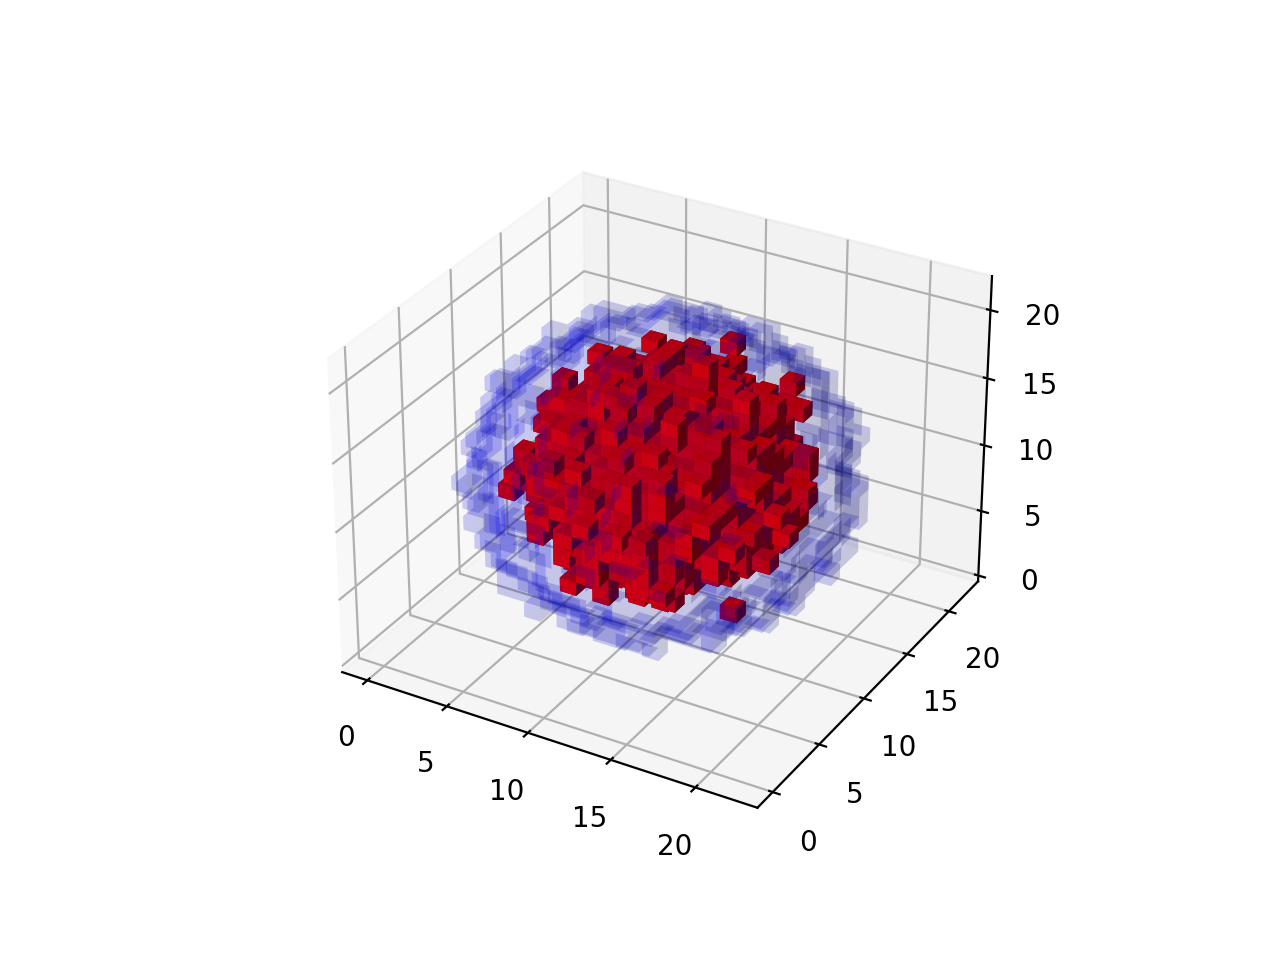

In [3]:
%matplotlib notebook


adj_bounds = (bounds[0]+1, bounds[1]+1, bounds[2]+1)
lp = np.zeros(adj_bounds, dtype=bool)
for coord in lava:
    x, y, z = coord
    lp[x][y][z] = True
    
a = np.zeros(adj_bounds, dtype=bool)
for coord in air_pockets:
    x, y, z = coord
    a[x][y][z] = True

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
    
alpha = 0.1
colors = np.empty(list(adj_bounds) + [4], dtype=np.float32)

colors[:] = [0, 0, 1, alpha] # blue

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(lp, facecolors=colors)


alpha = 1
acolors = np.empty(list(adj_bounds) + [4], dtype=np.float32)

acolors[:] = [1, 0, 0, alpha] # red
ax.voxels(a, facecolors=acolors)

plt.show()